In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from jupyterthemes import jtplot
jtplot.style(figsize=(15,5))

In [2]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [3]:
all_data = pd.read_csv("lum_class.csv")
all_data.head()

,HIP,Longitudine galactică,Latitudine galactică,Nume,Constelație,Tipul Spectral,Clasă de luminozitate,Index B-V(culoare),Magnitudine absolută(VMag),Luminozitate(Lum),Magnitudine aparentă (Vmag),Temperatură efectivă,Radius
0,85224,6.002311,9.393616,NaN,Ophiuchus,F,main-sequence,0.511,3.35,4.16,8.48,6352.6,1.728
1,85632,7.555411,8.938844,NaN,Ophiuchus,G,main-sequence,0.564,3.41,3.87,7.68,6224.6,1.652
2,85195,6.320694,9.669149,HR 6473,Ophiuchus,B,main-sequence,0.046,-0.63,161.74,6.34,10495.0,3.947
3,85253,7.278535,10.095614,NaN,Ophiuchus,K,main-sequence,0.825,6.00,0.41,9.74,5195.0,0.761
4,86208,7.446210,6.895463,NaN,Ophiuchus,K,giants,1.079,1.66,28.28,7.45,4744.0,6.923


In [4]:
all_data['Clasă de luminozitate'] = all_data['Clasă de luminozitate'].map({'main-sequence': 0, 'sub-giants': 1, 'giants': 2, 'super-giants': 3})
all_data.head()

,HIP,Longitudine galactică,Latitudine galactică,Nume,Constelație,Tipul Spectral,Clasă de luminozitate,Index B-V(culoare),Magnitudine absolută(VMag),Luminozitate(Lum),Magnitudine aparentă (Vmag),Temperatură efectivă,Radius
0,85224,6.002311,9.393616,NaN,Ophiuchus,F,0,0.511,3.35,4.16,8.48,6352.6,1.728
1,85632,7.555411,8.938844,NaN,Ophiuchus,G,0,0.564,3.41,3.87,7.68,6224.6,1.652
2,85195,6.320694,9.669149,HR 6473,Ophiuchus,B,0,0.046,-0.63,161.74,6.34,10495.0,3.947
3,85253,7.278535,10.095614,NaN,Ophiuchus,K,0,0.825,6.00,0.41,9.74,5195.0,0.761
4,86208,7.446210,6.895463,NaN,Ophiuchus,K,2,1.079,1.66,28.28,7.45,4744.0,6.923


In [7]:
stars = {
    'hip' : all_data['HIP'],
    'type' : all_data['Clasă de luminozitate'],
    'vmag' : all_data['Magnitudine absolută(VMag)'],
    'bv' : all_data['Index B-V(culoare)'],
    'temp' : all_data['Temperatură efectivă'],
    'rad' : all_data['Radius'],
    'lum' : all_data['Luminozitate(Lum)']
}
stars = pd.DataFrame.from_dict(stars)
stars.head()

,hip,type,vmag,bv,temp,rad,lum
0,85224,0,3.35,0.511,6352.6,1.728,4.16
1,85632,0,3.41,0.564,6224.6,1.652,3.87
2,85195,0,-0.63,0.046,10495.0,3.947,161.74
3,85253,0,6.00,0.825,5195.0,0.761,0.41
4,86208,2,1.66,1.079,4744.0,6.923,28.28


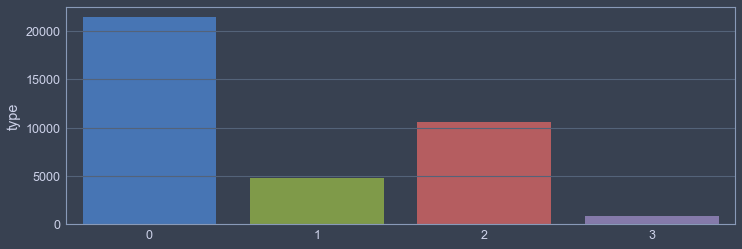

In [8]:
types = pd.DataFrame(stars["type"].value_counts().sort_values(ascending=False))
ax = sns.barplot(x = types.index, y = 'type' , data = types)

<AxesSubplot:>

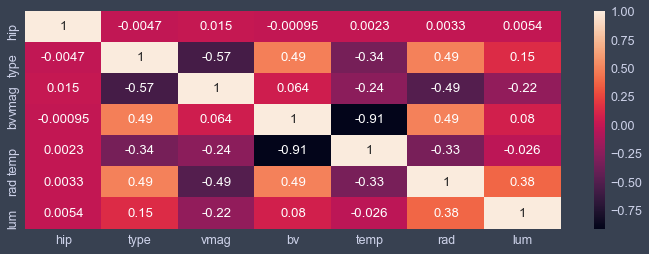

In [9]:
corr_matrix = stars.corr()
sns.heatmap(corr_matrix, annot=True)

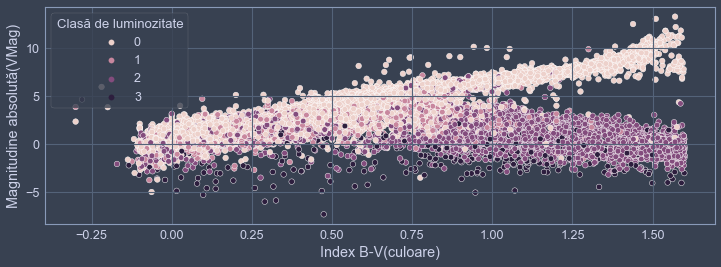

In [11]:
g1 = sns.scatterplot(data=all_data, x='Index B-V(culoare)', y='Magnitudine absolută(VMag)', hue='Clasă de luminozitate')

<AxesSubplot:xlabel='type', ylabel='temp'>

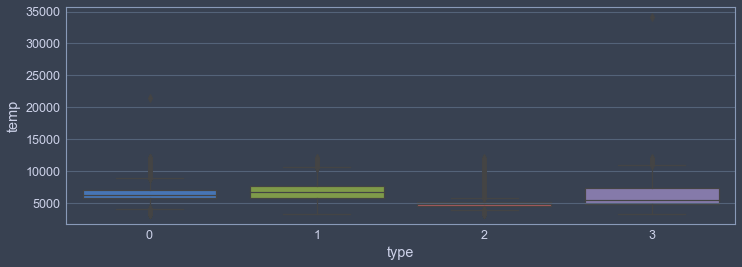

In [12]:
sns.boxplot(x=stars['type'], y=stars['temp'])

<AxesSubplot:xlabel='type', ylabel='vmag'>

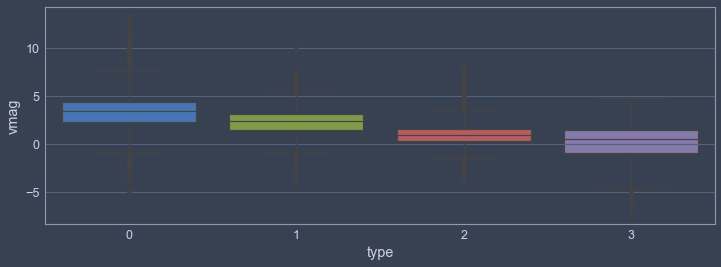

In [13]:
sns.boxplot(x=stars['type'], y=stars['vmag'])

<AxesSubplot:xlabel='type', ylabel='bv'>

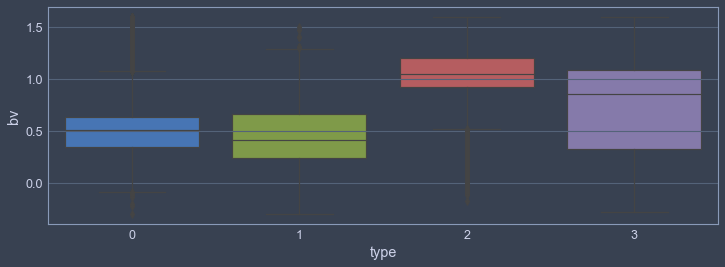

In [14]:
sns.boxplot(x=stars['type'], y=stars['bv'])

In [16]:
stars.dtypes

hip       int64
type      int64
vmag    float64
bv      float64
temp    float64
rad     float64
lum     float64
dtype: object

In [18]:
stars['type'] = stars['type'].astype(float)
stars1 = stars.copy()
stars1.head()

,hip,type,vmag,bv,temp,rad,lum
0,85224,0.0,3.35,0.511,6352.6,1.728,4.16
1,85632,0.0,3.41,0.564,6224.6,1.652,3.87
2,85195,0.0,-0.63,0.046,10495.0,3.947,161.74
3,85253,0.0,6.00,0.825,5195.0,0.761,0.41
4,86208,2.0,1.66,1.079,4744.0,6.923,28.28


In [19]:
scaler = MinMaxScaler()

stars1['vmag'] = scaler.fit_transform(np.expand_dims(stars1['vmag'], axis=1))
stars1['bv'] = scaler.fit_transform(np.expand_dims(stars1['bv'], axis=1))
stars1['temp'] = scaler.fit_transform(np.expand_dims(stars1['temp'], axis=1))
stars1['rad'] = scaler.fit_transform(np.expand_dims(stars1['rad'], axis=1))
stars1['lum'] = scaler.fit_transform(np.expand_dims(stars1['lum'], axis=1))

stars1.head()

,hip,type,vmag,bv,temp,rad,lum
0,85224,0.0,0.519203,0.427067,0.100798,0.002311,0.000057
1,85632,0.0,0.522120,0.454976,0.096664,0.002200,0.000053
2,85195,0.0,0.325717,0.182201,0.234557,0.005546,0.002219
3,85253,0.0,0.648031,0.592417,0.063418,0.000901,0.000006
4,86208,2.0,0.437044,0.726172,0.048855,0.009884,0.000388


In [21]:
X_train, X_test, y_train, y_test = train_test_split(stars1.drop(['hip','type'],axis=1), stars1['type'], test_size=0.15)
print("X_train shape is", X_train.shape)
print("X_test shape is", X_test.shape)
print("y_train shape is", y_train.shape)
print("y_test shape is", y_test.shape)

X_train shape is (32015, 5)
X_test shape is (5650, 5)
y_train shape is (32015,)
y_test shape is (5650,)


In [22]:
s_logreg = LogisticRegression(max_iter=1000000)
s_logreg.fit(X_train, y_train)
s_pred_lreg = s_logreg.predict(X_test)

print(classification_report(y_test, s_pred_lreg, zero_division=0))

              precision    recall  f1-score   support

         0.0       0.78      0.98      0.87      3209
         1.0       0.17      0.00      0.01       708
         2.0       0.85      0.84      0.84      1610
         3.0       0.33      0.01      0.02       123

    accuracy                           0.80      5650
   macro avg       0.53      0.46      0.43      5650
weighted avg       0.71      0.80      0.73      5650



In [25]:
s_rfc = RandomForestClassifier(n_estimators=200)
s_rfc.fit(X_train,y_train)

s_pred_rfc = s_rfc.predict(X_test)
print(classification_report(y_test, s_pred_rfc, zero_division=0))

              precision    recall  f1-score   support

         0.0       0.80      0.94      0.86      3209
         1.0       0.30      0.13      0.18       708
         2.0       0.86      0.83      0.85      1610
         3.0       0.59      0.15      0.25       123

    accuracy                           0.79      5650
   macro avg       0.64      0.51      0.53      5650
weighted avg       0.75      0.79      0.76      5650



Best accuracy score |0.8012389380530973| achieved at max depth |9|


[Text(0.5, 0, 'Random Forest Max Depth'), Text(0, 0.5, 'Accuracy Score')]

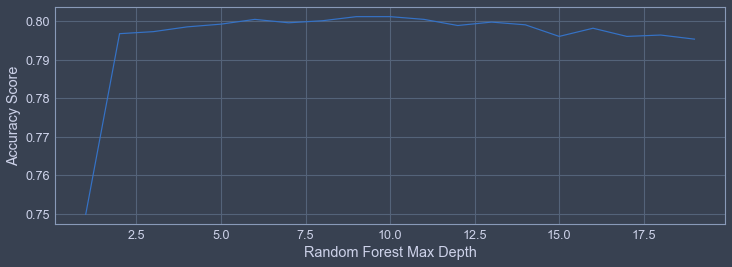

In [24]:
sr_accuracy_scores = []
sr_max_depths = []

for sr_max_depth in range(1, 20):
    sr_rfc = RandomForestClassifier(n_estimators=100, max_depth = sr_max_depth)
    sr_rfc.fit(X_train,y_train)

    sr_pred_rfc = sr_rfc.predict(X_test)
    sr_test_accuracy = accuracy_score(y_test, sr_pred_rfc)

    sr_max_depths.append(sr_max_depth)
    sr_accuracy_scores.append(sr_test_accuracy)

print(f'Best accuracy score |{max(sr_accuracy_scores)}| achieved at max depth |{np.argmax(sr_accuracy_scores) + 1}|')
ax = sns.lineplot(x = sr_max_depths, y = sr_accuracy_scores)
ax.set(xlabel='Random Forest Max Depth', ylabel='Accuracy Score')